# Chapter 3: Norm and distance

## 3.1 Norm

Euclidean norm, denoted by $||x|| = ||x||_2 =  \sqrt{\Sigma_i x_i^2} = \sqrt{x^Tx}$

### RMS (root-mean-square)

RMS of n-vector $x$: $\frac{||x||}{\sqrt{n}}$

In [44]:
uv(i,n) = [zeros(i-1); 1; zeros(n-i)] #unit vector
uv(4,5)

norm(x) = sqrt(x'*x) # norm
norm(uv(4,5))

1.0

In [45]:
rms(x) = norm(x) / sqrt(length(x)) # root mean square

rms (generic function with 1 method)

In [46]:
ms(x) = x'*x / length(x) # mean square
rms2(x) = sqrt(ms(x))

rms2 (generic function with 1 method)

In [47]:
x1 = [1,2,3,4,5]
print(rms(x) == rms2(x))

false

In [48]:
x2 = ones(5)

5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [49]:
using LinearAlgebra
using VMLS
rms(x)

2.2241103090149705

In [50]:
t = 0:0.01:1;
x = cos.(8*t) - 2*sin.(11*t)
avg(x)

-0.04252943783238692

In [51]:
rms(x)

1.0837556422598003

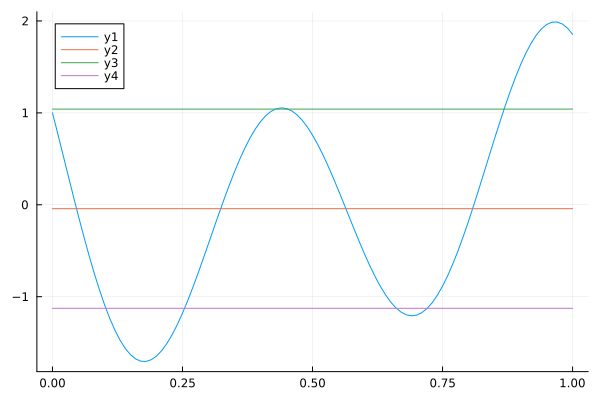

In [52]:
using Plots 

plot(t,x)
plot!(t, avg(x)*ones(length(x)))
plot!(t, (avg(x)+rms(x))*ones(length(x)))
plot!(t, (avg(x)-rms(x))*ones(length(x)))

### Norm of block vectors

Suppose $a,b,c$ are vectors

$||(a,b,c)|| = \sqrt(||a||^2 + ||b||^2 + ||c||^2) = ||(||a||,||b||,||c||)||$

In [53]:
e4 = uv(4,5)
z = [x1;e4;x2]
znorm = norm(z)

7.810249675906654

In [54]:
blocknorm = norm([norm(x1), norm(e4), norm(x2)])

7.810249675906654

In [55]:
znorm == blocknorm

true

### Chebyshev Inequality 

Let $k$ be the number of elements $x_i$ where $|x_i| \geq a$

$k \leq \frac{||x||^2}{a^2}$

also means that: 

fraction of entries where $|x_i| \geq a \leq (\frac{rms(x)}{a})^2$ 

In [56]:
# chebyshev bound function

cheb_bound(x,a) = floor(norm(x)^2/a^2)
cheb_bound(x,1.5)

52.0

In [57]:
# count the number of actual entires |x_i| > a
sum(abs.(x) .>= 1.5)

20

## 3.2 Distance

Euclidean Distance: $dist(a,b) = ||a-b||$

RMS Deivation between a & b: $rms(a-b)$

In [58]:
u = [1.8,2.0,-3.7,4.7]
v = [.6,2.1,1.9,-1.4]
w = [2.0,1.9,-4.0,4.6]

norm(u-v), norm(u-w), norm(v-w)

(8.36779540858881, 0.3872983346207417, 8.532877591996735)

In [102]:
# nearest neighbor

nn(x,z) = z[argmin([norm(x-zi) for zi in z])]
z = ([2,1],[7,2],[5.5,4],[4,8],[1,5],[9,6])
print(nn([5,6],z))
print(nn([3,3],z))

[5.5, 4.0][2, 1]

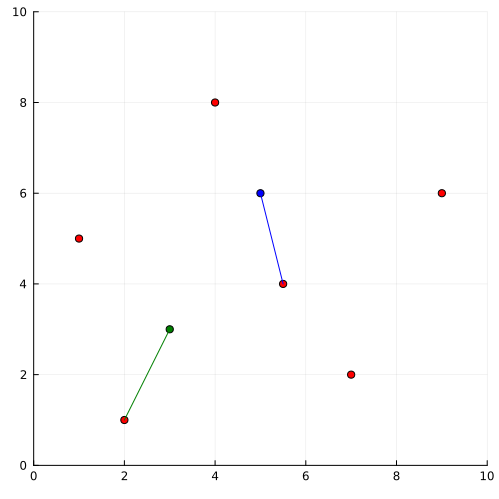

In [114]:
using Plots
xvals = [x[1] for x in z]
yvals = [x[2] for x in z]
scatter(xvals, yvals, color =:red)

x1 = [5,6]
nn1 = nn(x1,z)
x2 = [3,3]
nn2 = nn(x2,z)
scatter!([x1[1]], [x1[2]], color =:blue)
plot!([x1[1],nn1[1]],[x1[2],nn1[2]], color = :blue)
scatter!([x2[1]], [x2[2]], color =:green)
plot!([x2[1],nn2[1]],[x2[2],nn2[2]], color =:green)
plot!(xlims=(0,10),ylims=(0,10),size=(500,500))
plot!(legend=false)

In [60]:
# de-mean of a vector 

using LinearAlgebra

demean(x) = x .-avg(x)
x = [1,-2.2,3]
avg(x)

0.6

In [43]:
xtilde = demean(x)

3-element Vector{Float64}:
  0.4
 -2.8000000000000003
  2.4

In [62]:
avg(xtilde) # the mean of the demeaned is very close to zero.

-1.4802973661668753e-16

### Triangle Inequality

Consider the edge A,B to be the longest side of the triangle

$||a-b|| = ||(a-c)+(b-c)|| \leq ||a-c|| + ||b-c||$

More generally an also write as: 

$||x+y|| \leq ||x|| + ||y||$

### 

In [33]:
# randn generates random numbers from gaussian distribution (mean 0, std dev 1)
x = randn(10); y = randn(10); 
lhs = norm(x+y)
rhs = norm(x) + norm(y)

using Printf
@printf("||x + y|| <= ||x|| + ||y||: %f <= %f", lhs, rhs)


||x + y|| <= ||x|| + ||y||: 5.292877 <= 6.415676

In [64]:
x = 2 * randn(10,10) .+ 2 # use of randn

10×10 Matrix{Float64}:
 -1.92964     0.345185   0.920085  …   4.91277   5.57879    2.40277
  1.21231     1.96284   -0.584699     -2.56658   4.06945    2.01814
 -0.371867    5.78844    2.01567       1.95648   2.15271    4.41228
  3.17252     4.30489    2.34801       4.38989   2.27661   -1.26538
  0.555123    7.01282    1.15587       1.96129   1.55144    0.660606
 -1.60021    -1.31059    5.3328    …   1.53922   5.66584    5.31581
 -0.0840287   3.40334    1.39043       3.58853  -1.55614    4.74718
  4.20429     1.72554    3.5029        4.6897   -0.189489   3.27632
  0.914856    4.20825    5.5453        1.83581   1.12949    3.5981
  2.30658     0.443062   3.19287       3.04071   4.89454    2.32797

## 3.3 Standard deviation 

$std(x) = \frac{||x - avg(x)1||}{\sqrt{n}}$

In [67]:
x = rand(100);
stddev(x) = norm(demean(x)) / sqrt(length(x));
stddev(x)

0.30795632477036217

a = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 avg(a) = 1.000000, stdev(a) = 0.000000
b = [5, 1, -2, 3, 6, 3, -1, 3, 4, 1]
 avg(b) = 2.300000, stdev(b) = 2.410394
c = [5, 7, -2, 2, -3, 1, -1, 2, 7, 8]
 avg(c) = 2.600000, stdev(c) = 3.773592
d = [-1, -3, -4, -3, 7, -1, 0, 3, 9, 5]
 avg(d) = 1.200000, stdev(d) = 4.308132

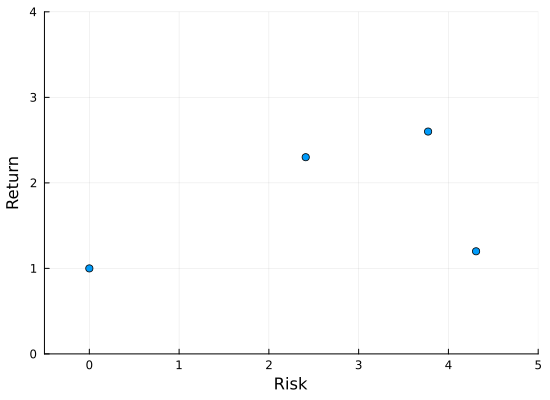

In [129]:
# return and risk 
# x is returns over time period of an investment
# return is avg(x)
# risk is stdev(x)

using Printf
using VMLS
a = ones(10);
@printf("a = %s\n avg(a) = %f, stdev(a) = %f\n", a, avg(a), stdev(a))
b = [ 5, 1, -2, 3, 6, 3, -1, 3, 4, 1 ];
@printf("b = %s\n avg(b) = %f, stdev(b) = %f\n", b, avg(b), stdev(b))
c = [ 5, 7, -2, 2, -3, 1, -1, 2, 7, 8 ];
@printf("c = %s\n avg(c) = %f, stdev(c) = %f\n", c, avg(c), stdev(c))
d = [ -1, -3, -4, -3, 7, -1, 0, 3, 9, 5 ];
@printf("d = %s\n avg(d) = %f, stdev(d) = %f", d, avg(d), stdev(d))

xs = [a,b,c,d]
returns = [avg(x) for x in xs]
risks = [stdev(x) for x in xs]

using Plots

scatter(risks, returns)
plot!(xlims=(-.5,5),ylims=(0,4),size=(550,400))
plot!(xlabel="Risk", ylabel="Return")
plot!(legend=false)

In [100]:
# standardizing a vector 

function standardize(x)
    xtilde = demean(x)
    return xtilde/rms(xtilde)
end

x = rand(100);
@printf("avg(x) = %f, stdev(x) = %f\n", avg(x), stdev(x))
z = standardize(x)
# should be mean (close to) 0, stdev = 0
@printf("avg(z) = %f, stdev(z) = %f\n", avg(z), stdev(z)) 

avg(x) = 0.528507, stdev(x) = 0.259938
avg(z) = 0.000000, stdev(z) = 1.000000


## 3.4 Angle 

angle between 2 vectors x,y = $cos^{-1}(\frac{x^Ty}{||x||||y||})$

In [63]:
# 2 rand vectors
a = .01*rand(-100:100, 1000);
b = .01*rand(-100:100, 1000);

In [36]:
# cauchy - schwarz inequality 

dotprod = abs(a'*b)
normprod = norm(a)*norm(b)

using Printf 
@printf("abs(a'*b) <= norm(a)*norm(b): %f <= %f \n", dotprod, normprod)

abs(a'*b) <= norm(a)*norm(b): 6.079800 <= 330.227546 


In [37]:
a = .01*rand(-100:100, 1000)
b = .01*rand(-100:100, 1000)
theta = acos(a'*b/(norm(a)*norm(b)))

# classification of angles 
@printf("Is the angle b/w a and b acute? %s\n", a'*b >= 0)
@printf("Is the angle b/w a and b obtuse? %s", a'*b <= 0)

Is the angle b/w a and b acute? true
Is the angle b/w a and b obtuse? false

In [115]:
cosangle(a,b) = a'*b/(norm(a)*norm(b))
ang(a,b) = acos(cosangle(a,b))

ang (generic function with 1 method)

In [119]:
a = [1,2,-1]; b=[2,0,-3];
@printf("angle between a = %s and b = %s = %f radians\n", a, b, ang(a,b))
@printf("angle between a = %s and b = %s = %f degrees", a, b, ang(a,b)*(360/(2*pi)))


angle between a = [1, 2, -1] and b = [2, 0, -3] = 0.968983 radians
angle between a = [1, 2, -1] and b = [2, 0, -3] = 55.518611 degrees

### Correlation coefficient 

For vectors $a$ and $b$, 
$\rho = \frac{\tilde{a}^T\tilde{b}}{||\tilde{a}||||\tilde{b}||}$
where $\tilde{a}$ and$\tilde{b}$ are the de-meaned versions of $a$ and $b$. 

In [39]:
a = rand(-100:100, 50)
b = rand(-100:100, 50)

atilde = a .- avg(a)
btilde = b .- avg(b)

rho = cosangle(atilde, btilde)
using Printf
@printf("correlation coefficient %.3f\n", rho)

correlation coefficient -0.096


a = [4.4, 9.4, 15.4, 12.4, 10.4, 1.4, -4.6, -5.6, -0.6, 7.4]
b = [6.2, 11.2, 14.2, 14.2, 8.2, 2.2, -3.8, -4.8, -1.8, 4.2]
correlation coefficient between a and b: 0.967820



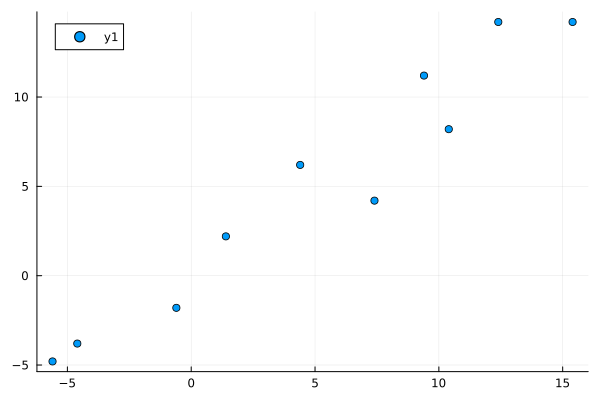

In [131]:
function correlation_coeff(a,b)
    atilde = a .- avg(a)
    btilde = b .- avg(b)
    rho = cosangle(atilde, btilde)
    return rho
end

a = [4.4, 9.4, 15.4, 12.4, 10.4, 1.4, -4.6, -5.6, -0.6, 7.4]
b = [6.2, 11.2, 14.2, 14.2, 8.2, 2.2, -3.8, -4.8, -1.8, 4.2]
@printf("a = %s\nb = %s\ncorrelation coefficient between a and b: %f\n\n", a, b, correlation_coeff(a,b))
scatter(a,b)

a = [4.1, 10.1, 15.1, 13.1, 7.1, 2.1, -2.9, -5.9, 0.1, 7.1]
b = [5.5, -0.5, -4.5, -3.5, 1.5, 7.5, 13.5, 14.5, 11.5, 4.5]
correlation coefficient between a and b: -0.987521



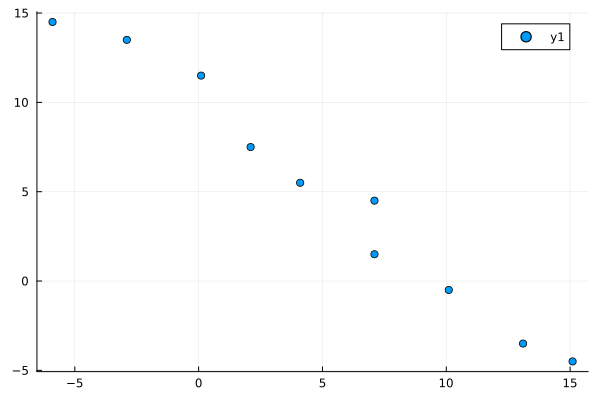

In [125]:
a = [4.1, 10.1, 15.1, 13.1, 7.1, 2.1, -2.9, -5.9, 0.1, 7.1]
b = [5.5, -0.5, -4.5, -3.5, 1.5, 7.5, 13.5, 14.5, 11.5, 4.5]
@printf("a = %s\nb = %s\ncorrelation coefficient between a and b: %f\n\n", a, b, correlation_coeff(a,b))
scatter(a,b)

a = [-5.0, 0.0, 5.0, 8.0, 13.0, 11.0, 1.0, 6.0, 4.0, 7.0]
b = [5.8, 0.8, 7.8, 9.8, 0.8, 11.8, 10.8, 5.8, -0.2, -3.2]
correlation coefficient between a and b: 0.004021



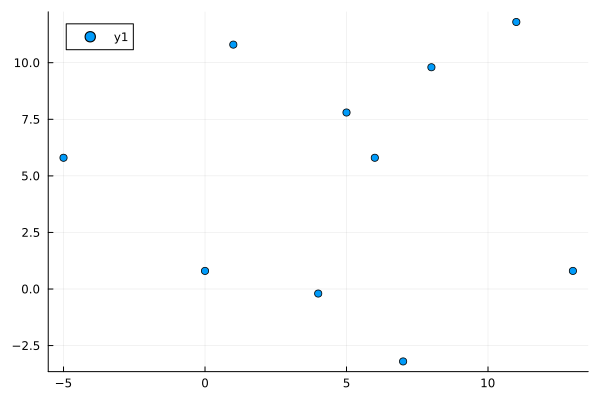

In [127]:
a = [-5.0, 0.0, 5.0, 8.0, 13.0, 11.0, 1.0, 6.0, 4.0, 7.0]
b = [5.8, 0.8, 7.8, 9.8, 0.8, 11.8, 10.8, 5.8, -0.2, -3.2]
@printf("a = %s\nb = %s\ncorrelation coefficient between a and b: %f\n\n", a, b, correlation_coeff(a,b))
scatter(a,b)

## 3.5 (Runtime) Complexity 

norm (2n flops)
- n multiplications 
- n-1 additions
- 1 sqrt 

rms (2n flops)
- same as norm (ignoring 2 flops involved in / sqrt(n))

distance (3n flops)

angle (6n flops)

demean (2n flops)
- n for average 
- n for subtraction

stdev (3n-4n flops)
- 2n for demean 
- 2n for rms 

correlation coefficient (10n flops) 

nearest neighbor amongst k n-vectors z to n-vector x 
- 3kn flops 
- simplified to kn

In [144]:
# time to compute the correlation coefficient of 2 n-vectors is approximately linear in n
x = randn(10^6); y = randn(10^6);
@time correlation_coeff(x,y);

  0.005669 seconds (5 allocations: 15.259 MiB, 27.69% gc time)


In [140]:
x = randn(10^7); y = randn(10^7);
@time correlation_coeff(x,y);

  0.051159 seconds (5 allocations: 152.588 MiB, 10.65% gc time)


In [141]:
x = randn(10^8); y = randn(10^8);
@time correlation_coeff(x,y);

  0.633548 seconds (5 allocations: 1.490 GiB, 10.15% gc time)
